In [97]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
from scipy import optimize
from sympy.solvers import solve
from sympy import Symbol
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('expand_frame_repr', False)

In [98]:
qa = pd.read_csv('QA_metadata_tabDelimited.txt', sep = "\t")
simplified = qa[['ProcessDataID', 'CodeName', 'cathodeMass']]
simplified = simplified.dropna()
simplified

,ProcessDataID,CodeName,cathodeMass
0,1012915.0,QA_85_14,18.136944
1,844856.0,QA_53_1,18.439984
2,231580.0,QA_13_1,28.088160
3,231766.0,QA_14_8,28.273980
4,844841.0,QA_55_14,18.932424
...,...,...,...
1115,869192.0,QA_67_7,29.115060
1116,849394.0,QA_59_4,19.352454
1117,1011020.0,QA_87_12,18.136944
1118,1001061.0,QA_77_3,18.193764


In [99]:
def path_listing(path):
    path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[:13] == "ProcessDataID"]
    for i in path_files:
        print(i)
    return path_files
def test_func(x, a, b, c, d, e):
        return a*x**4 + b*x**3 + c*x**2 + d*x**1 + e

In [121]:
path_list = path_listing(r'C:\Users\cjang.WILDCAT\Desktop\data_driven\CJ_work')
x = path_list[0]

ProcessDataID_184982_tabDelimited.txt
ProcessDataID_184985_tabDelimited.txt
ProcessDataID_184988_tabDelimited.txt
ProcessDataID_184991_tabDelimited.txt
ProcessDataID_184994_tabDelimited.txt
ProcessDataID_184997_tabDelimited.txt
ProcessDataID_185000_tabDelimited.txt
ProcessDataID_185003_tabDelimited.txt
ProcessDataID_185006_tabDelimited.txt
ProcessDataID_185009_tabDelimited.txt
ProcessDataID_185012_tabDelimited.txt
ProcessDataID_185015_tabDelimited.txt
ProcessDataID_185018_tabDelimited.txt
ProcessDataID_185021_tabDelimited.txt
ProcessDataID_185024_tabDelimited.txt
ProcessDataID_185027_tabDelimited.txt


In [122]:
ids = []
for i in path_list:
    up1 = i.strip('ProcessDataID_')
    no = up1.strip('_tabDelimited.txt')
    ids.append(float(no))
    #print(float(no))
ids

[184982.0,
 184985.0,
 184988.0,
 184991.0,
 184994.0,
 184997.0,
 185000.0,
 185003.0,
 185006.0,
 185009.0,
 185012.0,
 185015.0,
 185018.0,
 185021.0,
 185024.0,
 185027.0]

In [123]:
def pred_diff_plot(input):
    if type(input) == list:
        df = pd.read_csv(i, sep = "\t")
        
    elif type(input) == str:
        assert(input[:13] == "ProcessDataID")
        df = pd.read_csv(input, sep = "\t")
    else:
        print("Wrong Input")
    simplified = df[['ProcessDataID', 'CodeName', 'cathodeMass']]
    simplified = simplified.dropna()
    i = list(simplified['ProcessDataID'])

    df['cathodeMass'] = np.ones(len(df)) * simplified.iloc[i.index(df['ProcessDataID'][0])].cathodeMass
    df['divided'] = df['StateCapacity_mAh']/df['cathodeMass']
    si = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]


    tenth_dis = si[(si['Cycle'] == 10) & (si['State'] == 'Discharge')]
    #tenth cycle plot
    tenth_charge = si[(si['Cycle'] == 10) & (si['State'] == 'Charge')]

    #plt.plot(tenth_charge['divided'], tenth_charge['Voltage_V'])
    #plt.plot(tenth_dis['divided'], tenth_dis['Voltage_V'])

    si = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]
    hundth_dis = si[(si['Cycle'] == 100) & (si['State'] == 'Discharge')]
    #tenth cycle plot
    hundth_charge = si[(si['Cycle'] == 100) & (si['State'] == 'Charge')]

    #plt.plot(hundth_charge['divided'], hundth_charge['Voltage_V'])
    #plt.plot(hundth_dis['divided'], hundth_dis['Voltage_V'])
    y_data = tenth_charge['Voltage_V']
    x_data = tenth_charge['divided']
    params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,p0=[0, 0, 0, 0, 0])
    sols = []
    for i in hundth_charge['Voltage_V']:
        x = Symbol('x', real=True)
        solutions = solve(params[0]*x**4 + params[1]*x**3 + params[2]*x**2 + params[3]*x**1 + params[4] - i, x)
        #print(solutions[0])
        sols.append(solutions[0])
    hundth_charge_preds = {'voltage': hundth_charge['Voltage_V'], 'hund mass': hundth_charge['divided'], 'tenth mass': sols}
    df1 = pd.DataFrame(data = hundth_charge_preds)
    df1['difference'] = abs(df1['hund mass'] - df1['tenth mass'])
    fig1, ax1 = plt.subplots() 
    ax1.set_ylabel("Difference between the 10th and 100th Capacity")
    ax1.set_xlabel("Voltage")
    ax1.plot(df1['voltage'], df1['difference'])

In [1]:
def volt_statecap(lst_input):
    
    df = pd.read_csv(lst_input, sep = "\t")
    simplified = df[['ProcessDataID', 'CodeName', 'cathodeMass']]
    simplified = simplified.dropna()
    i = list(simplified['ProcessDataID'])

    df['cathodeMass'] = np.ones(len(df)) * simplified.iloc[i.index(df['ProcessDataID'][0])].cathodeMass
    df['divided'] = df['StateCapacity_mAh']/df['cathodeMass']
    si = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]


    tenth_dis = si[(si['Cycle'] == 10) & (si['State'] == 'Discharge')]
    #tenth cycle plot
    tenth_charge = si[(si['Cycle'] == 10) & (si['State'] == 'Charge')]

    si = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]
    hundth_dis = si[(si['Cycle'] == 100) & (si['State'] == 'Discharge')]
    #tenth cycle plot
    hundth_charge = si[(si['Cycle'] == 100) & (si['State'] == 'Charge')]

    fig1, ax1 = plt.subplots() 
    ax1.plot(tenth_charge['divided'], tenth_charge['Voltage_V'])
    ax1.plot(tenth_dis['divided'], tenth_dis['Voltage_V'])
    ax1.plot(hundth_charge['divided'], hundth_charge['Voltage_V'])
    ax1.plot(hundth_dis['divided'], hundth_dis['Voltage_V'])
    ax1.set_title("Tenth Charge and Discharge for " + lst_input)
    ax1.set_xlabel("State Capacity(mAh/g")
    ax1.set_ylabel("Voltage")

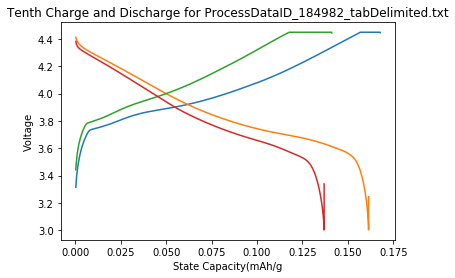

In [131]:
volt_statecap(x)

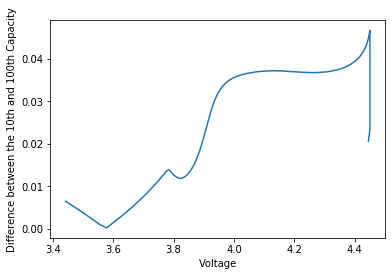

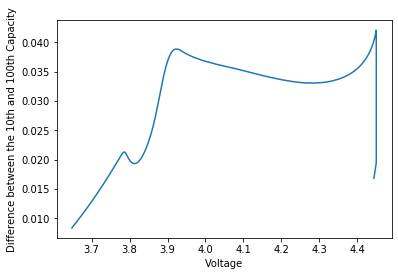

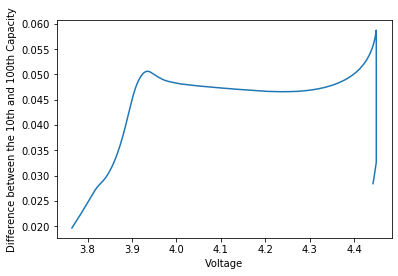

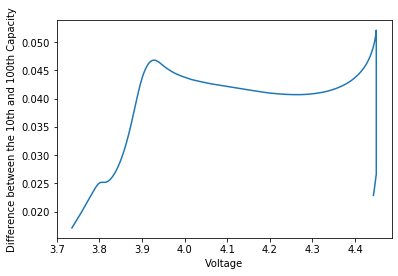

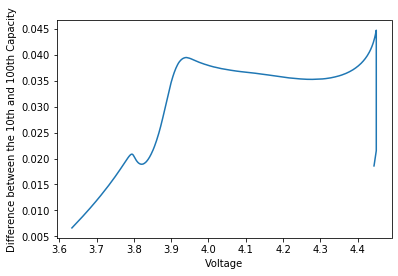

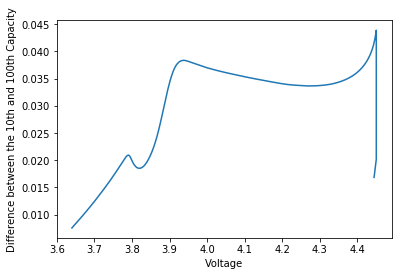

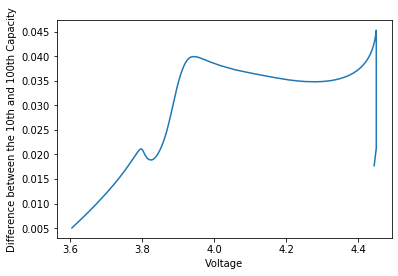

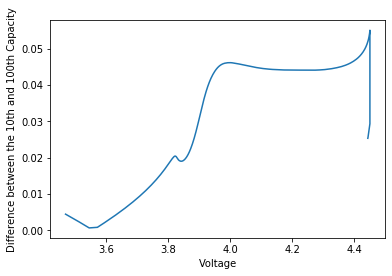

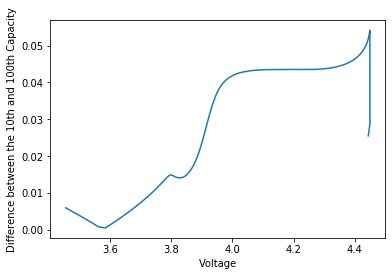

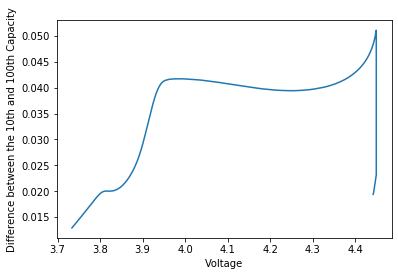

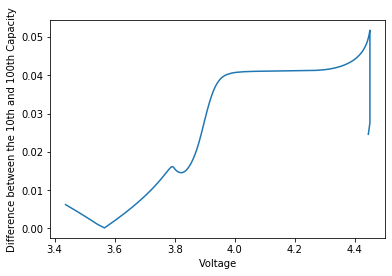

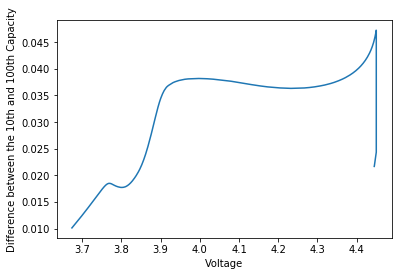

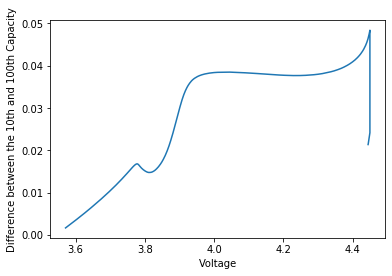

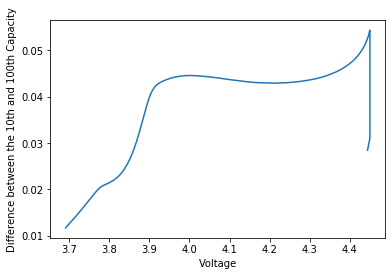

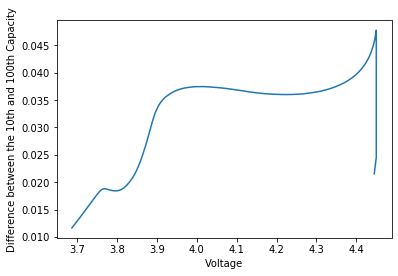

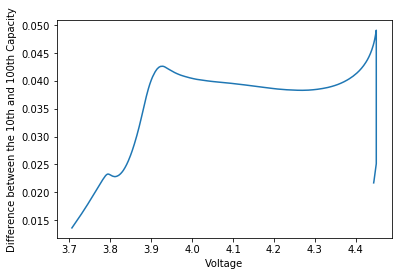

In [133]:
for inpt in path_list:
    pred_diff_plot(inpt)